In [1]:
import numpy as np
from time import time
import os
import matplotlib.pyplot as plt
import bigbadbrain as bbb
from sklearn.decomposition import PCA

%matplotlib inline

# NON-DOWNSAMPLED VERSION

### Load brain data

In [2]:
directory = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_25/func_0'
brain_path = os.path.join(directory, 'brain_zscored_green.nii')
brain = bbb.load_numpy_brain(brain_path)
dims = bbb.get_dims(brain)
print('brain shape is x,y,z,t {}'.format(brain.shape))


~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 22.23 sec
brain shape is x,y,z,t (128, 92, 51, 4128)


### Use one slice. Reshape into voxels by time

In [3]:
z=25
X = brain[:,:,z,:].reshape(-1,brain.shape[-1]).T
print('X is time by voxels {}'.format(X.shape))

X is time by voxels (4128, 11776)


### Perform PCA

##### https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [4]:
pca = PCA().fit(X)

In [5]:
pca_scores = pca.components_
print('Scores is PC by voxel {}'.format(pca_scores.shape))

Scores is PC by voxel (4128, 11776)


In [7]:
pca_scores_reshaped = np.reshape(pca_scores, (-1,dims['y'],dims['x']))
print('new shape: {}'.format(pca_scores_reshaped.shape))

new shape: (4128, 128, 92)


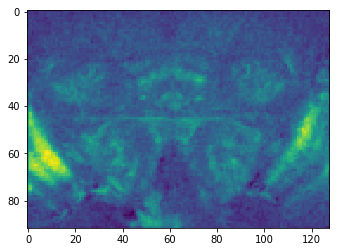

In [9]:
plt.imshow(pca_scores_reshaped[0,:,:].T)

### I believe this is how I get the "loadings"?

In [12]:
pca_loadings = pca.transform(X)
print('Loadings is time by PC {}'.format(pca_loadings.shape))

Loadings is time by PC (4128, 4128)


Text(0.5, 1.0, 'PC1')

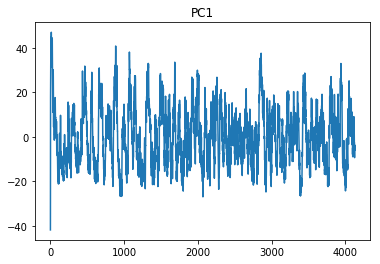

In [13]:
plt.plot(pca_loadings[:,0])
plt.title('PC1')

Text(0, 0.5, 'Cumulative variance explained')

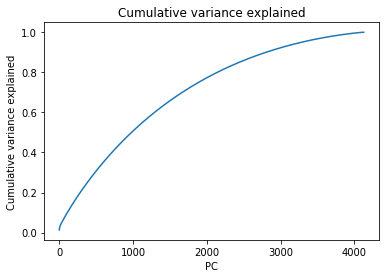

In [11]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative variance explained')
plt.xlabel('PC')
plt.ylabel('Cumulative variance explained')

# DOWNSAMPLE VOXELS FIRST

In [27]:
brain_slice = brain[:,:,25,:]
print(brain_slice.shape)

(128, 92, 4128)


In [28]:
brain_slice_downsampled = brain_slice[:,30:50,:]
print(brain_slice_downsampled.shape)

(128, 20, 4128)


In [29]:
X = brain_slice_downsampled[:,:,:].reshape(-1,brain.shape[-1]).T
print('X is time by DOWNSAMPLED voxels {}'.format(X.shape))

X is time by DOWNSAMPLED voxels (4128, 2560)


# Now input X is time by voxels (4128,2560)

### Perform PCA

##### https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [33]:
pca = PCA().fit(X)

In [35]:
pca_scores = pca.components_
print('Scores is PC by voxel {}'.format(pca_scores.shape))

pca_scores_reshaped = np.reshape(pca_scores, (-1,dims['y'],20))
print('new shape: {}'.format(pca_scores_reshaped.shape))

Scores is PC by voxel (2560, 2560)
new shape: (2560, 128, 20)


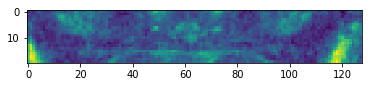

In [36]:
plt.imshow(pca_scores_reshaped[0,:,:].T)

### I believe this is how I get the "loadings"?

In [37]:
pca_loadings = pca.transform(X)
print('Loadings is time by PC {}'.format(pca_loadings.shape))

Loadings is time by PC (4128, 2560)


Text(0.5, 1.0, 'PC1')

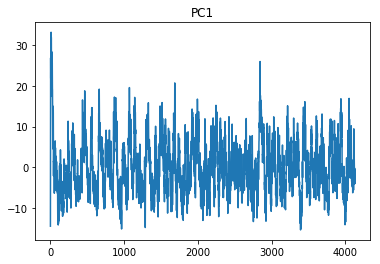

In [38]:
plt.plot(pca_loadings[:,0])
plt.title('PC1')

Text(0, 0.5, 'Cumulative variance explained')

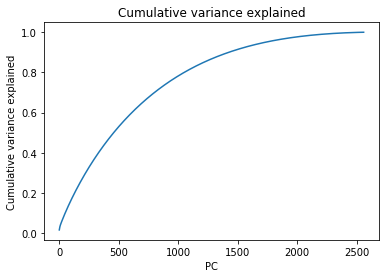

In [39]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative variance explained')
plt.xlabel('PC')
plt.ylabel('Cumulative variance explained')

# Confirm by manual SVG

In [41]:
print('using input X (time by voxels) with shape {}'.format(X.shape))

using input X (time by voxels) with shape (4128, 2560)


In [42]:
U, Sigma, Vh = np.linalg.svd(X,full_matrices=False,compute_uv=True)
# Transform X with SVD components
X_svd = np.dot(U, np.diag(Sigma))

In [51]:
print('U shape: {}'.format(U.shape))
print('Sigma shape: {}'.format(Sigma.shape))
print('Vh shape: {}'.format(Vh.shape))
print('X_svd shape: {}'.format(X_svd.shape))

U shape: (4128, 2560)
Sigma shape: (2560,)
Vh shape: (2560, 2560)
X_svd shape: (4128, 2560)


In [55]:
Vh_reshaped = np.reshape(Vh, (-1,dims['y'],20))
Vh_reshaped.shape

(2560, 128, 20)

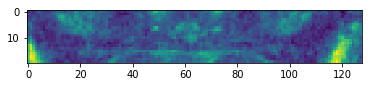

In [57]:
plt.imshow(Vh_reshaped[0,:,:].T)

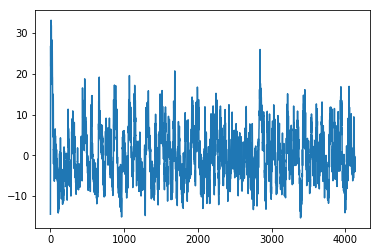

In [44]:
plt.plot(X_svd[:,0])

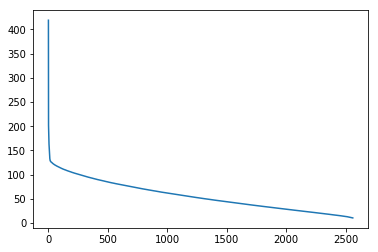

In [58]:
plt.plot(Sigma)

Text(0, 0.5, 'Cumulative variance explained')

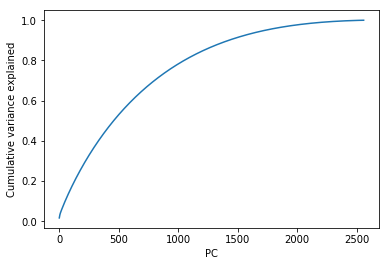

In [69]:
plt.plot(np.cumsum((Sigma**2)/np.sum(Sigma**2)))
plt.xlabel('PC')
plt.ylabel('Cumulative variance explained')